In [97]:
# import csv file
import pandas as pd

# Load the CSV file into a DataFrame
data_path = '/home/ll/inDB_ML_survey/temp_data/'
df = pd.read_csv(data_path + 'uc03_lags.csv')

# Display the first few rows of the DataFrame
df.head()

,week_index,store_id,department_id,total_sales,total_sales_lag_1,total_sales_lag_2,total_sales_lag_3,total_sales_lag_4,total_sales_lag_5,total_sales_lag_6,total_sales_lag_7,total_sales_avg_3,total_sales_avg_7
0,1,1,automotive,4565.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4565.750000,4565.750000
1,2,1,automotive,4662.88,4565.75,NaN,NaN,NaN,NaN,NaN,NaN,4614.315000,4614.315000
2,3,1,automotive,4760.60,4662.88,4565.75,NaN,NaN,NaN,NaN,NaN,4663.076667,4663.076667
3,4,1,automotive,4131.21,4760.60,4662.88,4565.75,NaN,NaN,NaN,NaN,4518.230000,4530.110000
4,5,1,automotive,3973.98,4131.21,4760.60,4662.88,4565.75,NaN,NaN,NaN,4288.596667,4418.884000


In [98]:
# select all rows where department_id = 'automotive' and store_id = 1
sales_data = df[(df['department_id'] == 'automotive') & (df['store_id'] == 1)]

In [99]:
sales_data

,week_index,store_id,department_id,total_sales,total_sales_lag_1,total_sales_lag_2,total_sales_lag_3,total_sales_lag_4,total_sales_lag_5,total_sales_lag_6,total_sales_lag_7,total_sales_avg_3,total_sales_avg_7
0,1,1,automotive,4565.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4565.750000,4565.750000
1,2,1,automotive,4662.88,4565.75,NaN,NaN,NaN,NaN,NaN,NaN,4614.315000,4614.315000
2,3,1,automotive,4760.60,4662.88,4565.75,NaN,NaN,NaN,NaN,NaN,4663.076667,4663.076667
3,4,1,automotive,4131.21,4760.60,4662.88,4565.75,NaN,NaN,NaN,NaN,4518.230000,4530.110000
4,5,1,automotive,3973.98,4131.21,4760.60,4662.88,4565.75,NaN,NaN,NaN,4288.596667,4418.884000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,1,automotive,10226.80,4756.69,4481.69,3924.57,4947.13,5258.50,5273.70,4891.74,6488.393333,5552.725714
100,101,1,automotive,4641.82,10226.80,4756.69,4481.69,3924.57,4947.13,5258.50,5273.70,6541.770000,5462.457143
101,102,1,automotive,4330.59,4641.82,10226.80,4756.69,4481.69,3924.57,4947.13,5258.50,6399.736667,5329.898571
102,103,1,automotive,5491.97,4330.59,4641.82,10226.80,4756.69,4481.69,3924.57,4947.13,4821.460000,5407.732857


In [100]:
# get basic stats on sales_data['total_sales']
sales_data['total_sales'].describe()

count      104.000000
mean      5402.410288
std       1620.975115
min       3924.570000
25%       4524.580000
50%       4919.115000
75%       5344.300000
max      10564.640000
Name: total_sales, dtype: float64

/tmp/ipykernel_3390595/3247933353.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['moving_avg'] = sales_data['total_sales'].rolling(window=window_size).mean()


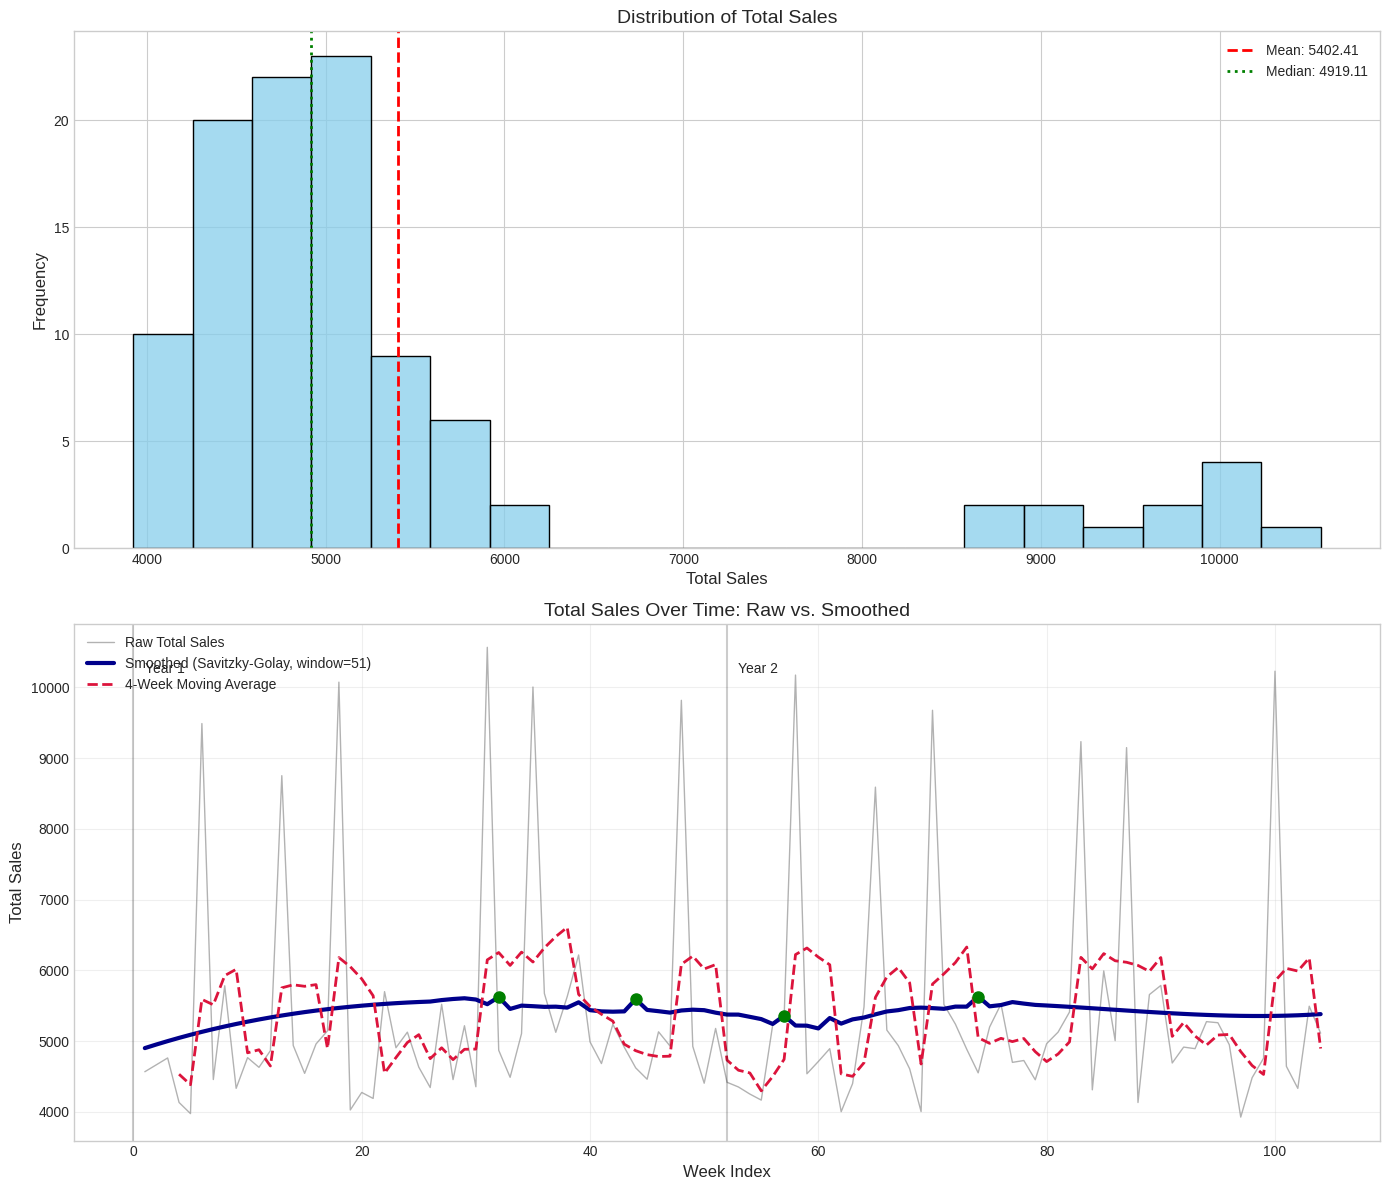

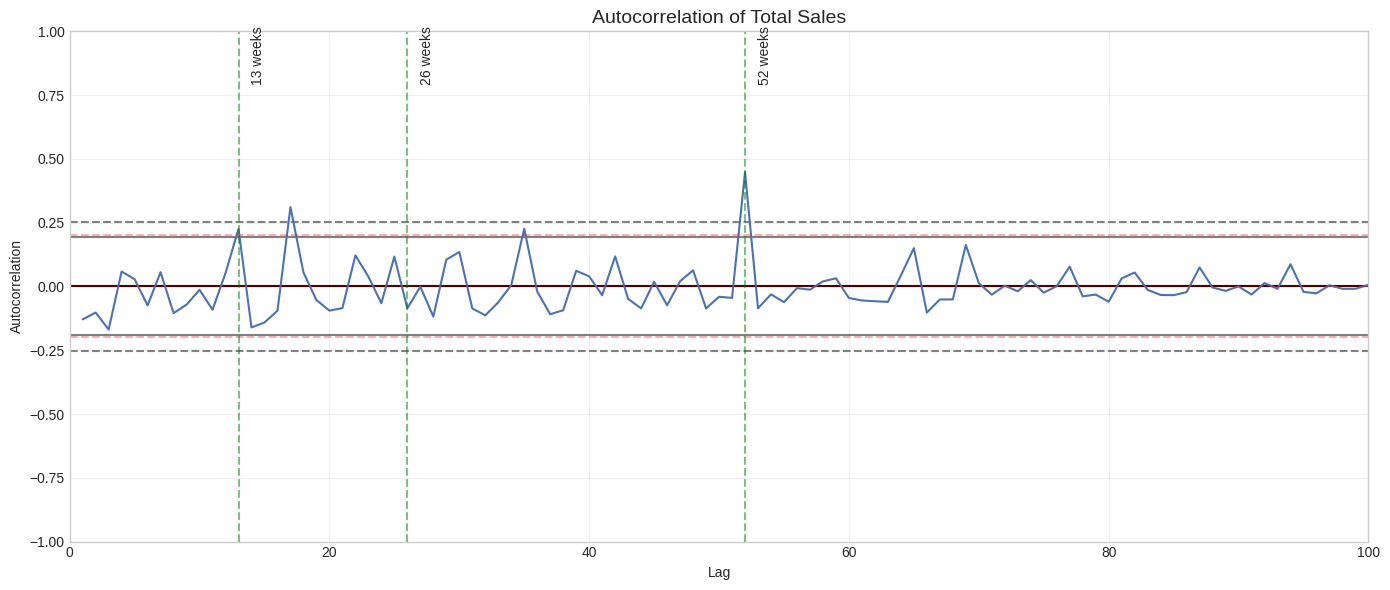


Descriptive Statistics for Sales Data:
count      104.000000
mean      5402.410288
std       1620.975115
min       3924.570000
25%       4524.580000
50%       4919.115000
75%       5344.300000
max      10564.640000
Name: total_sales, dtype: float64


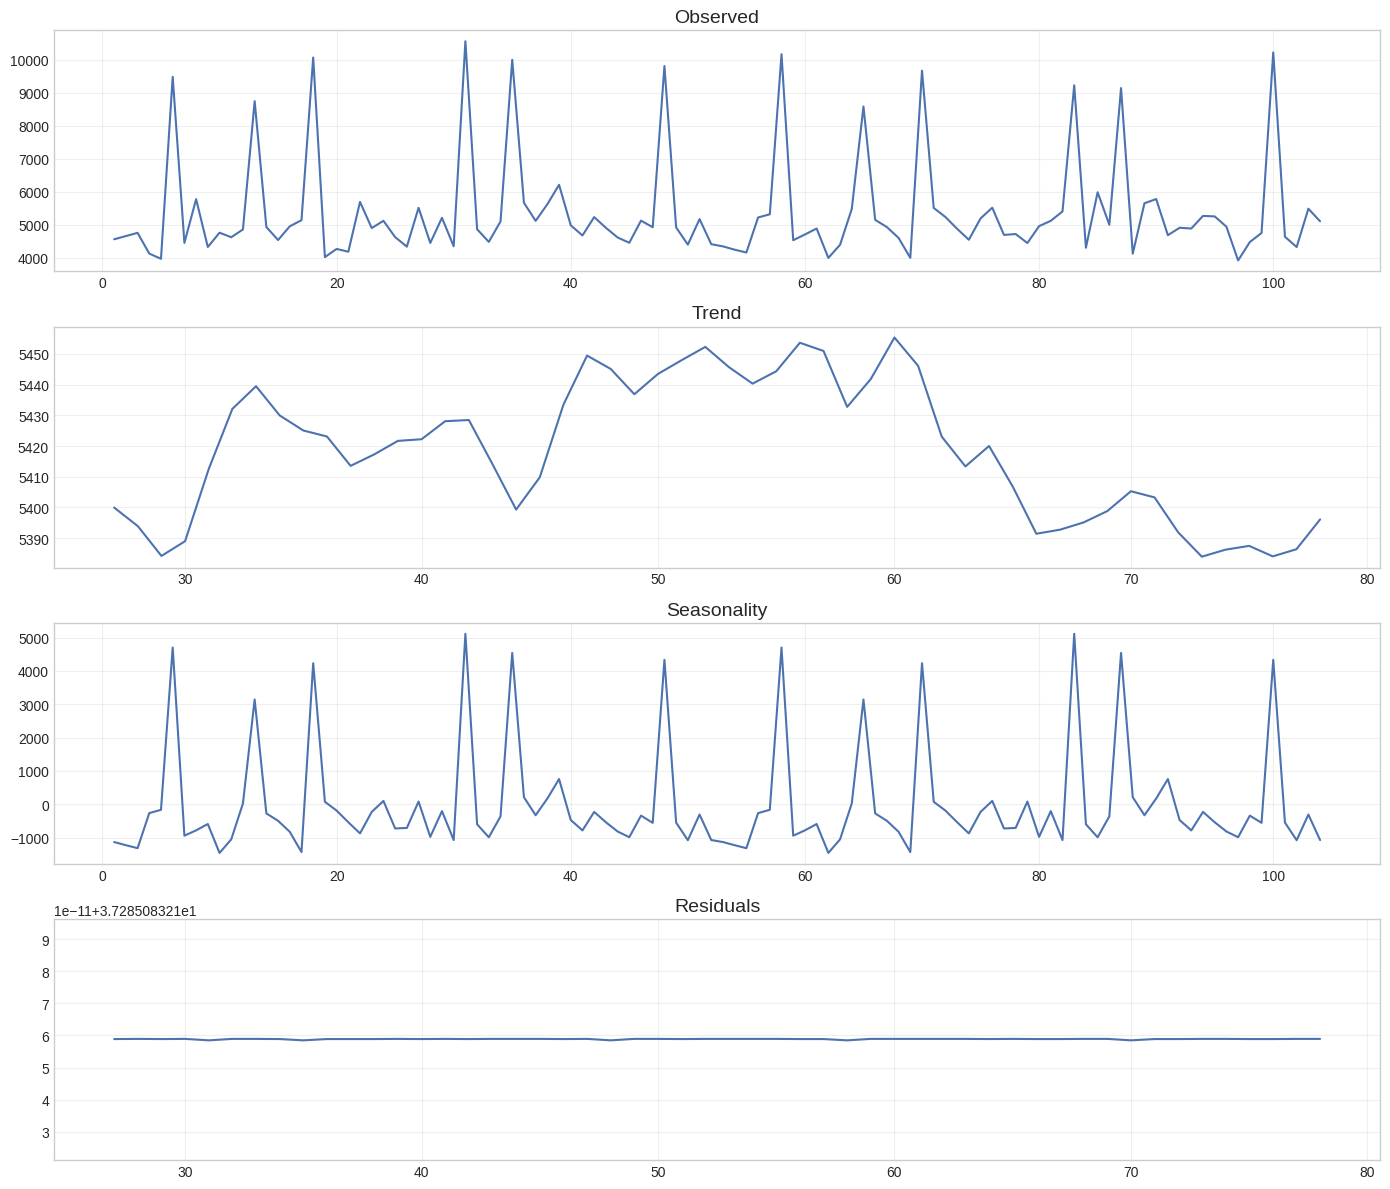


Seasonality Strength: 1.0401
Interpretation:
Strong seasonal pattern detected (>0.5)


In [ ]:
# EDA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting a clean, modern visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12))

# 1. Raw Histogram of Total Sales
sns.histplot(sales_data['total_sales'], bins=20, kde=False, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Total Sales', fontsize=14)
ax1.set_xlabel('Total Sales', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Add vertical line for mean and median
mean_sales = sales_data['total_sales'].mean()
median_sales = sales_data['total_sales'].median()
ax1.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sales:.2f}')
ax1.axvline(median_sales, color='green', linestyle=':', linewidth=2, label=f'Median: {median_sales:.2f}')
ax1.legend()

# 2. Time Series Plot with Smoothing
# Plot the raw data
ax2.plot(sales_data['week_index'], sales_data['total_sales'], 
         alpha=0.6, linewidth=1, label='Raw Total Sales', color='gray')

# Apply Savitzky-Golay filter for smoothing
# The window_length must be odd and less than the data length
window_length = min(51, len(sales_data) - (len(sales_data) % 2 - 1))  # Ensure window_length is odd and not too large
if window_length >= 3:  # Only apply filter if we have enough data points
    smooth_sales = savgol_filter(sales_data['total_sales'], window_length, 3)
    ax2.plot(sales_data['week_index'], smooth_sales, 
            linewidth=3, label=f'Smoothed (Savitzky-Golay, window={window_length})', color='darkblue')

# Also add a simple moving average for comparison
window_size = 4  # 4-week moving average
sales_data['moving_avg'] = sales_data['total_sales'].rolling(window=window_size).mean()
ax2.plot(sales_data['week_index'], sales_data['moving_avg'], 
         linewidth=2, label=f'{window_size}-Week Moving Average', color='crimson', linestyle='--')

# Customize the time series plot
ax2.set_title('Total Sales Over Time: Raw vs. Smoothed', fontsize=14)
ax2.set_xlabel('Week Index', fontsize=12)
ax2.set_ylabel('Total Sales', fontsize=12)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Add year markings if we have enough data (assuming weeks start at 0)
weeks = len(sales_data)
if weeks >= 52:
    for year in range(weeks // 52 + 1):
        week_num = year * 52
        if week_num < weeks:
            ax2.axvline(week_num, color='black', alpha=0.2, linestyle='-')
            ax2.text(week_num + 1, ax2.get_ylim()[1] * 0.95, f'Year {year+1}', 
                    fontsize=10, verticalalignment='top')

# Let's add annotations to highlight potential patterns
# Find local maxima in the smoothed data
if 'smooth_sales' in locals():
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(smooth_sales, distance=10)  # Find peaks at least 10 weeks apart
    for peak in peaks:
        ax2.plot(sales_data['week_index'].iloc[peak], smooth_sales[peak], 'o', color='green', markersize=8)
        # Only label a few peaks to avoid clutter
        if peak % 20 == 0:
            ax2.annotate(f'Peak', 
                        xy=(sales_data['week_index'].iloc[peak], smooth_sales[peak]),
                        xytext=(10, 20), textcoords='offset points',
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.2'))

# Adjust layout for the first set of plots
plt.tight_layout()
plt.show()

# Create a new figure for the autocorrelation plot
plt.figure(figsize=(14, 6))
autocorrelation_plot(sales_data['total_sales'])
plt.title('Autocorrelation of Total Sales', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(0, min(100, len(sales_data) - 1))  # Limit the x-axis for better visibility
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axhline(y=0.2, color='r', linestyle='--', alpha=0.3)  # Significance threshold (approximate)
plt.axhline(y=-0.2, color='r', linestyle='--', alpha=0.3)

# Add annotations for potential seasonal patterns
thresholds = [13, 26, 52]  # Weekly, quarterly, annual patterns
for t in thresholds:
    if t < len(sales_data):
        plt.axvline(x=t, color='green', linestyle='--', alpha=0.5)
        plt.text(t+1, 0.8, f'{t} weeks', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()

# Print descriptive statistics for seasonality detection
print("\nDescriptive Statistics for Sales Data:")
print(sales_data['total_sales'].describe())

# Perform a formal seasonality test if we have enough data
if len(sales_data) >= 104:  # Need at least 2 years of data for reliable seasonal testing
    # Decompose the time series into trend, seasonal, and residual components
    try:
        # Make sure the data is sorted by week_index
        sorted_sales = sales_data.sort_values('week_index')
        
        # Set the index to week_index for decomposition
        temp_series = sorted_sales.set_index('week_index')['total_sales']
        
        # Determine the period from autocorrelation or use 52 for annual pattern
        # You can adjust this based on your domain knowledge
        decomposition = seasonal_decompose(temp_series, model='additive', period=52)
        
        # Create a figure to show the decomposition
        plt.figure(figsize=(14, 12))
        
        plt.subplot(411)
        plt.plot(decomposition.observed)
        plt.title('Observed', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        plt.subplot(412)
        plt.plot(decomposition.trend)
        plt.title('Trend', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        plt.subplot(413)
        plt.plot(decomposition.seasonal)
        plt.title('Seasonality', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        plt.subplot(414)
        plt.plot(decomposition.resid)
        plt.title('Residuals', fontsize=14)
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Quantify the strength of seasonality
        observed_mean = np.mean(decomposition.observed)
        total_variation = np.sum((decomposition.observed - observed_mean)**2)
        seasonal_variation = np.sum(decomposition.seasonal**2)
        seasonality_strength = seasonal_variation / total_variation if total_variation > 0 else 0
        
        print(f"\nSeasonality Strength: {seasonality_strength:.4f}")
        print("Interpretation:")
        if seasonality_strength > 0.5:
            print("Strong seasonal pattern detected (>0.5)")
        elif seasonality_strength > 0.3:
            print("Moderate seasonal pattern detected (0.3-0.5)")
        elif seasonality_strength > 0.1:
            print("Weak seasonal pattern detected (0.1-0.3)")
        else:
            print("No significant seasonal pattern detected (<0.1)")
    except Exception as e:
        print(f"Could not perform seasonal decomposition: {e}")
        print("This might be due to missing values, non-numeric data, or insufficient data points.")

In [103]:
# impute missing values for engineered features

from sklearn.impute import SimpleImputer

def preprocess_sales_data(sales_data):
    """
    Preprocess sales data by handling missing values and converting data types.
    
    Parameters:
    sales_data (pd.DataFrame): Raw sales data
    
    Returns:
    pd.DataFrame: Preprocessed data ready for XGBoost
    """
    # First, let's make a copy to avoid modifying the original data
    df = sales_data.copy()
    
    # Check data types and missing values
    print("\nInitial data info:")
    print(df.info())
    print("\nMissing values count:")
    print(df.isnull().sum())
    
    # Separate numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    print("\nNumeric columns:", numeric_columns.tolist())
    print("Categorical columns:", categorical_columns.tolist())
    
    # Handle numeric columns first
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
    
    # Handle categorical columns
    for col in categorical_columns:
        # Check if the column contains only numeric values stored as strings
        if df[col].str.isnumeric().all():
            # Convert to numeric
            df[col] = pd.to_numeric(df[col])
        else:
            # For truly categorical data, use label encoding
            # First, fill NaN with a placeholder
            df[col] = df[col].fillna('MISSING')
            # Then convert to categorical codes
            df[col] = df[col].astype('category').cat.codes
    
    # Verify all columns are now numeric
    print("\nFinal data info:")
    print(df.info())
    
    # Check if any missing values remain
    print("\nRemaining missing values:")
    print(df.isnull().sum())
    
    return df

# Use the function to preprocess your data
clean_sales_data = preprocess_sales_data(sales_data)



Initial data info:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week_index         104 non-null    int64  
 1   store_id           104 non-null    int64  
 2   department_id      104 non-null    object 
 3   total_sales        104 non-null    float64
 4   total_sales_lag_1  103 non-null    float64
 5   total_sales_lag_2  102 non-null    float64
 6   total_sales_lag_3  101 non-null    float64
 7   total_sales_lag_4  100 non-null    float64
 8   total_sales_lag_5  99 non-null     float64
 9   total_sales_lag_6  98 non-null     float64
 10  total_sales_lag_7  97 non-null     float64
 11  total_sales_avg_3  104 non-null    float64
 12  total_sales_avg_7  104 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 11.4+ KB
None

Missing values count:
week_index           0
store_id             0
department_id        0

In [38]:
clean_sales_data

,week_index,store_id,department_id,total_sales,total_sales_lag_1,total_sales_lag_2,total_sales_lag_3,total_sales_lag_4,total_sales_lag_5,total_sales_lag_6,total_sales_lag_7,total_sales_avg_3,total_sales_avg_7,moving_avg
0,1.0,1.0,0,4565.75,5405.246893,5404.396667,5415.028416,5422.7605,5374.234848,5380.536327,5389.802784,4565.750000,4565.750000,5418.25203
1,2.0,1.0,0,4662.88,4565.750000,5404.396667,5415.028416,5422.7605,5374.234848,5380.536327,5389.802784,4614.315000,4614.315000,5418.25203
2,3.0,1.0,0,4760.60,4662.880000,4565.750000,5415.028416,5422.7605,5374.234848,5380.536327,5389.802784,4663.076667,4663.076667,5418.25203
3,4.0,1.0,0,4131.21,4760.600000,4662.880000,4565.750000,5422.7605,5374.234848,5380.536327,5389.802784,4518.230000,4530.110000,4530.11000
4,5.0,1.0,0,3973.98,4131.210000,4760.600000,4662.880000,4565.7500,5374.234848,5380.536327,5389.802784,4288.596667,4418.884000,4382.16750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100.0,1.0,0,10226.80,4756.690000,4481.690000,3924.570000,4947.1300,5258.500000,5273.700000,4891.740000,6488.393333,5552.725714,5847.43750
100,101.0,1.0,0,4641.82,10226.800000,4756.690000,4481.690000,3924.5700,4947.130000,5258.500000,5273.700000,6541.770000,5462.457143,6026.75000
101,102.0,1.0,0,4330.59,4641.820000,10226.800000,4756.690000,4481.6900,3924.570000,4947.130000,5258.500000,6399.736667,5329.898571,5988.97500
102,103.0,1.0,0,5491.97,4330.590000,4641.820000,10226.800000,4756.6900,4481.690000,3924.570000,4947.130000,4821.460000,5407.732857,6172.79500


In [59]:
# create a new df called df_nolags that only contains the columns 'week_index' and 'total_sales' where department = 'automotive' and store_id = 1

df_nolags = df[(df['department_id'] == 'automotive') & (df['store_id'] == 1)][['week_index', 'total_sales']]
df_nolags = preprocess_sales_data(df_nolags)
df_nolags


Initial data info:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week_index   104 non-null    int64  
 1   total_sales  104 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB
None

Missing values count:
week_index     0
total_sales    0
dtype: int64

Numeric columns: ['week_index', 'total_sales']
Categorical columns: []

Final data info:
<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   week_index   104 non-null    float64
 1   total_sales  104 non-null    float64
dtypes: float64(2)
memory usage: 2.4 KB
None

Remaining missing values:
week_index     0
total_sales    0
dtype: int64


,week_index,total_sales
0,1.0,4565.75
1,2.0,4662.88
2,3.0,4760.60
3,4.0,4131.21
4,5.0,3973.98
...,...,...
99,100.0,10226.80
100,101.0,4641.82
101,102.0,4330.59
102,103.0,5491.97


In [104]:
# train a simple XGBoost model using the imputed data

import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare features and target
X = clean_sales_data.drop(['total_sales'], axis=1)  # Adjust column name if different
y = clean_sales_data['total_sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create DMatrix objects (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1
}

# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)


Training Set Metrics:
--------------------------------------------------
R² Score: 0.9999
Mean Absolute Error (MAE): 10.24
Root Mean Squared Error (RMSE): 18.56
Mean Absolute Percentage Error (MAPE): 0.18%
Explained Variance Score: 0.9999

Test Set Metrics:
--------------------------------------------------
R² Score: 0.7115
Mean Absolute Error (MAE): 614.79
Root Mean Squared Error (RMSE): 1006.92
Mean Absolute Percentage Error (MAPE): 9.70%
Explained Variance Score: 0.7438


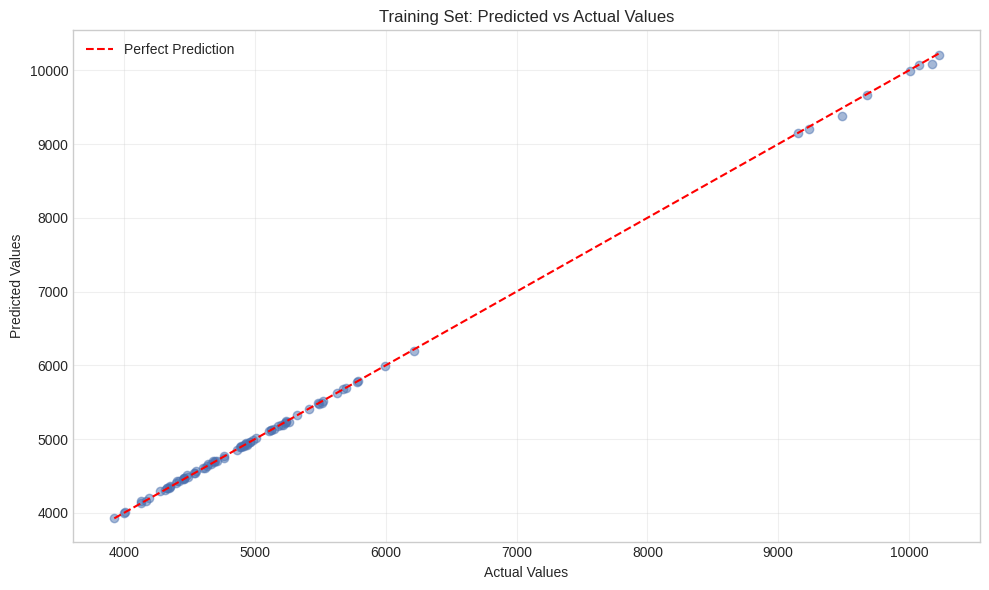

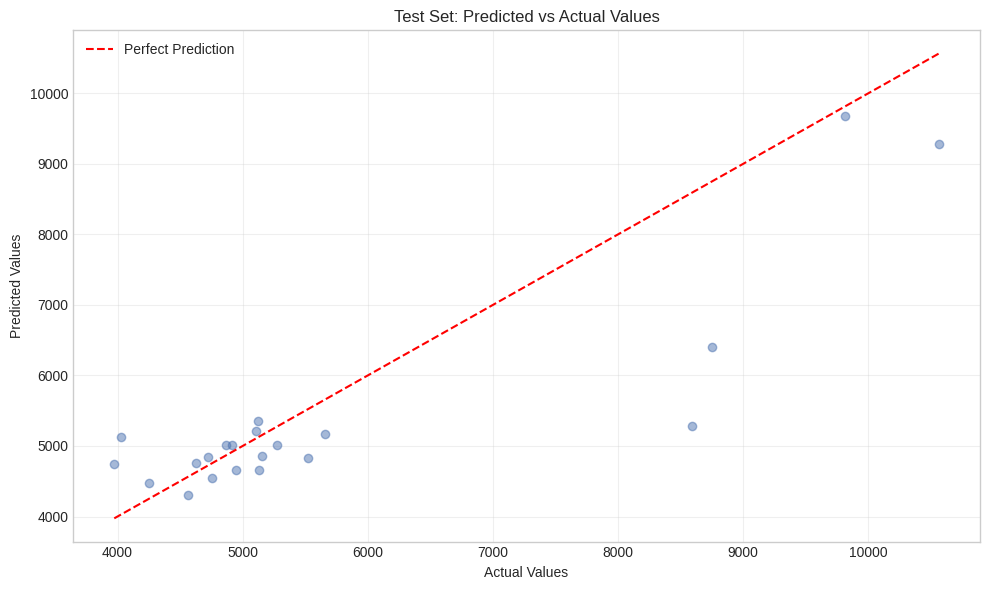

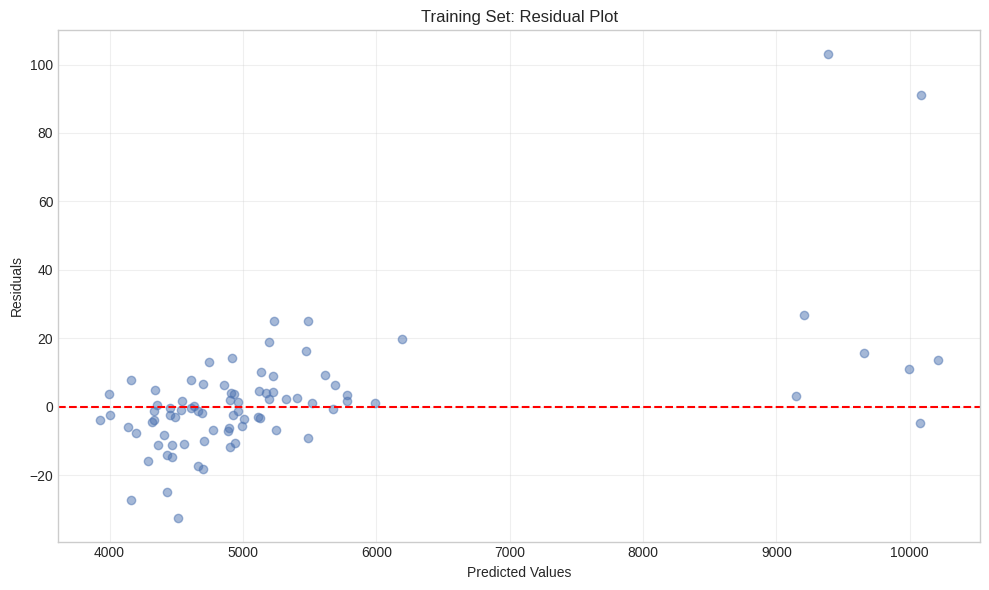

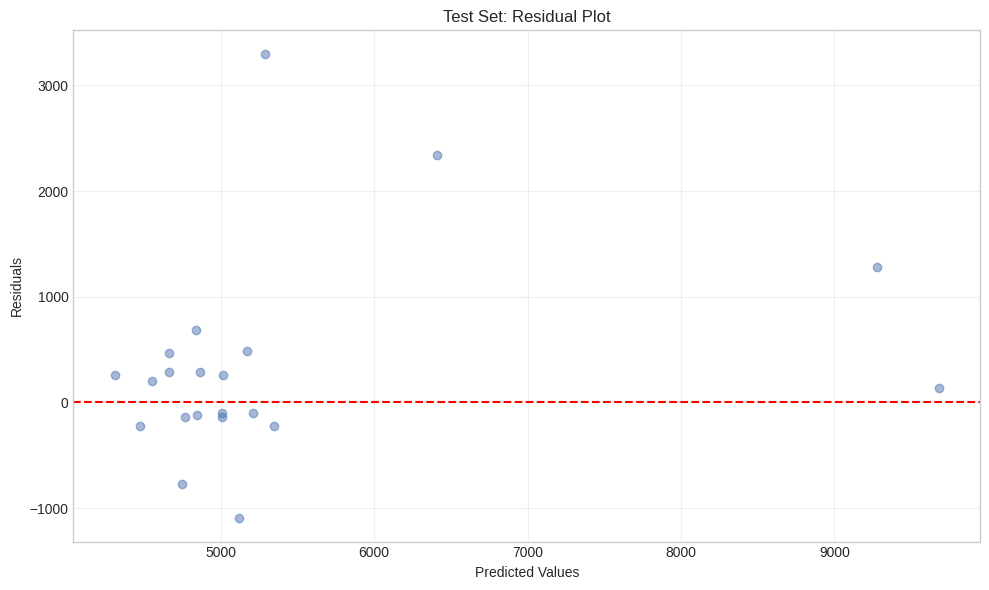

In [105]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
import numpy as np

# First, let's get predictions from our model
y_pred_train = model.predict(dtrain)
y_pred_test = model.predict(dtest)

# Now let's calculate various metrics for both training and test sets
def calculate_metrics(y_true, y_pred, dataset_name=""):
    """
    Calculate and display multiple regression metrics.
    
    Parameters:
    y_true: Actual values
    y_pred: Predicted values
    dataset_name: String indicating which dataset (e.g., "Training" or "Test")
    """
    # Calculate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    explained_var = explained_variance_score(y_true, y_pred)
    
    # Print results in a formatted way
    print(f"\n{dataset_name} Set Metrics:")
    print("-" * 50)
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Explained Variance Score: {explained_var:.4f}")
    
    # Return metrics in case you need them for further analysis
    return {
        'r2': r2,
        'mae': mae,
        'rmse': rmse,
        'mape': mape,
        'explained_variance': explained_var
    }

# Calculate metrics for both training and test sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")

# Let's also visualize the predictions vs actual values
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, title):
    """
    Create a scatter plot of predicted vs actual values with a perfect prediction line.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot scatter points
    plt.scatter(y_true, y_pred, alpha=0.5)
    
    # Plot perfect prediction line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create prediction plots
plot_predictions(y_train, y_pred_train, 'Training Set: Predicted vs Actual Values')
plot_predictions(y_test, y_pred_test, 'Test Set: Predicted vs Actual Values')

# Let's also look at the residuals
def plot_residuals(y_true, y_pred, title):
    """
    Create a residual plot to check for patterns in predictions.
    """
    residuals = y_true - y_pred
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Create residual plots
plot_residuals(y_train, y_pred_train, 'Training Set: Residual Plot')
plot_residuals(y_test, y_pred_test, 'Test Set: Residual Plot')

In [101]:
# train a simple XGBoost model using the original data
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Prepare features and target
X = df_nolags.drop(['total_sales'], axis=1)  # Adjust column name if different
y = df_nolags['total_sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create DMatrix objects (XGBoost's optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1
}

# Train the model
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=10,
    verbose_eval=False
)


Training Set Metrics:
--------------------------------------------------
R² Score: 0.6272
Mean Absolute Error (MAE): 534.89
Root Mean Squared Error (RMSE): 933.53
Mean Absolute Percentage Error (MAPE): 8.36%
Explained Variance Score: 0.6459

Test Set Metrics:
--------------------------------------------------
R² Score: -0.5354
Mean Absolute Error (MAE): 1490.38
Root Mean Squared Error (RMSE): 2322.71
Mean Absolute Percentage Error (MAPE): 22.34%
Explained Variance Score: -0.4410


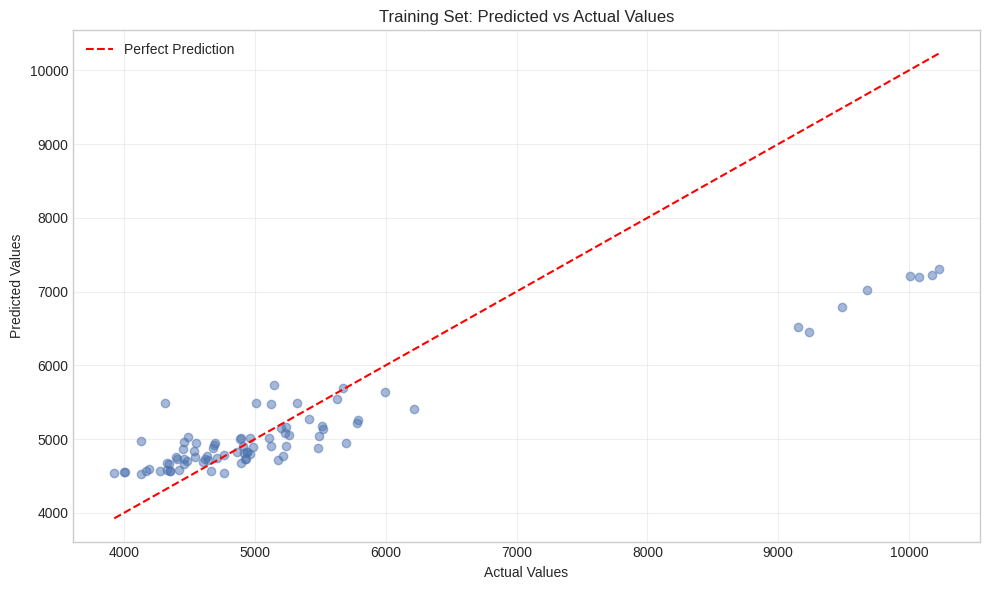

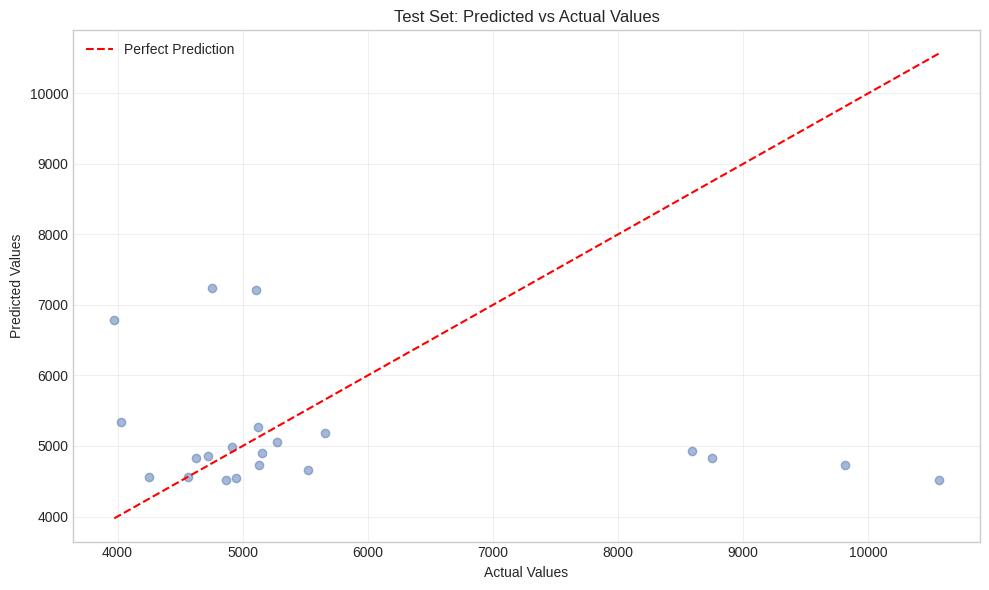

In [102]:
# First, let's get predictions from our model
y_pred_train = model.predict(dtrain)
y_pred_test = model.predict(dtest)
# Calculate metrics for both training and test sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")
plot_predictions(y_train, y_pred_train, 'Training Set: Predicted vs Actual Values')
plot_predictions(y_test, y_pred_test, 'Test Set: Predicted vs Actual Values')

## As expected, xgboost works fine with engineered features (lags and moving averages)
## Fails totally with the weekly sales data only

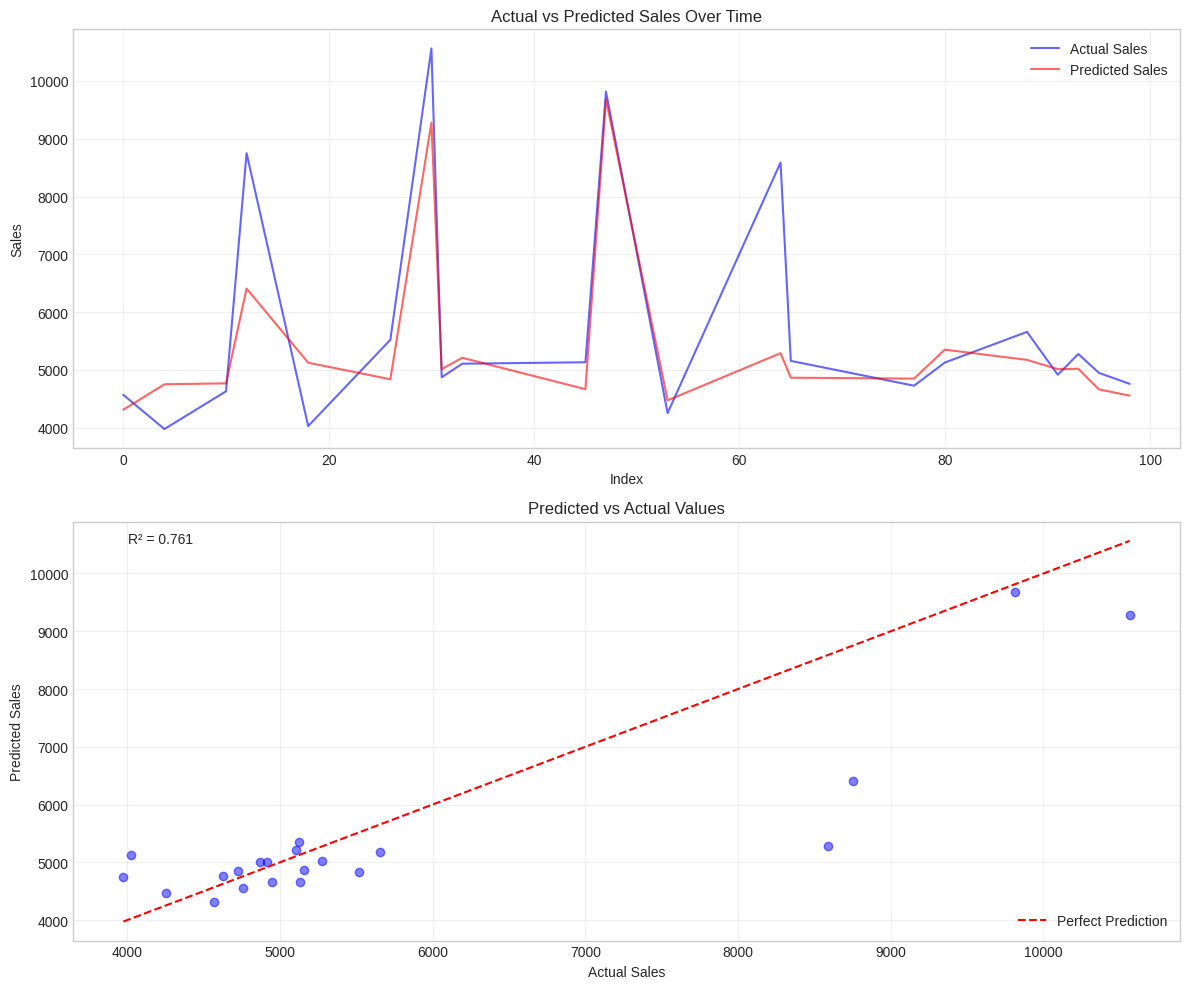


Model Performance Metrics:
R² Score: 0.711
Mean Absolute Error: 614.79
Root Mean Squared Error: 1006.92


In [106]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Get predictions for test set
y_pred = model.predict(dtest)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# 1. Time series plot of actual vs predicted values
# Sort test data by index to maintain time order
test_indices = X_test.index
sorted_indices = np.argsort(test_indices)

# Plot actual values
ax1.plot(test_indices[sorted_indices], y_test.iloc[sorted_indices], 
         label='Actual Sales', color='blue', alpha=0.6)
# Plot predicted values
ax1.plot(test_indices[sorted_indices], y_pred[sorted_indices], 
         label='Predicted Sales', color='red', alpha=0.6)

ax1.set_title('Actual vs Predicted Sales Over Time', fontsize=12)
ax1.set_xlabel('Index')
ax1.set_ylabel('Sales')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot with perfect prediction line
ax2.scatter(y_test, y_pred, alpha=0.5, color='blue')
# Add perfect prediction line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', 
         label='Perfect Prediction')

ax2.set_title('Predicted vs Actual Values', fontsize=12)
ax2.set_xlabel('Actual Sales')
ax2.set_ylabel('Predicted Sales')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add R-squared value to the plot
r2 = np.corrcoef(y_test, y_pred)[0, 1]**2
ax2.text(0.05, 0.95, f'R² = {r2:.3f}', 
         transform=ax2.transAxes, fontsize=10)

plt.tight_layout()
plt.show()

# Print some key metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\nModel Performance Metrics:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

In [46]:
clean_sales_data.to_csv(data_path + 'uc03_test_sales.csv', index=False)

In [48]:
clean_sales_data.columns

Index(['week_index', 'store_id', 'department_id', 'total_sales',
       'total_sales_lag_1', 'total_sales_lag_2', 'total_sales_lag_3',
       'total_sales_lag_4', 'total_sales_lag_5', 'total_sales_lag_6',
       'total_sales_lag_7', 'total_sales_avg_3', 'total_sales_avg_7',
       'moving_avg'],
      dtype='object')

In [85]:
# function aggregate tables to match the uc02 preprocessing logic
def load(order_path: str, lineitem_path: str, product_path: str) -> pd.DataFrame:
    order_data = pd.read_csv(order_path, parse_dates=['date'])
    lineitem_data = pd.read_csv(lineitem_path)
    product_data = pd.read_csv(product_path)
    data = order_data.merge(lineitem_data, left_on='o_order_id', right_on='li_order_id')
    data = data.merge(product_data, left_on='li_product_id', right_on='p_product_id')

    return data[['store', 'department', 'li_order_id', 'date', 'price', 'quantity']]

import pandas as pd
import numpy as np
import datetime

def pre_process(data: pd.DataFrame) -> pd.DataFrame:
    # Extract datetime components using isocalendar() for week
    iso_calendar = data['date'].dt.isocalendar()
    data['year'] = iso_calendar.year
    data['week'] = iso_calendar.week
    data['month'] = data['date'].dt.month
    
    # reset year for week crossovers
    data['year'] = np.where((data['week'] > 50) & (data['month'] == 1), 
                           data['year'] - 1, 
                           data['year'])
    
    # Calculate row price
    data['row_price'] = data['quantity'] * data['price']

    # Group by store, department, year, and week
    grouped = data.groupby(['store', 'department', 'year', 'week'])['row_price'].sum().reset_index()

    def make_date(year, week, weekday):
        date_str = f"{year}-W{week:02d}-{weekday}"
        date = datetime.datetime.strptime(date_str, '%G-W%V-%u')
        return date

    # Create date from year and week
    grouped['date'] = grouped.apply(
        lambda r: make_date(r['year'], r['week'], 5), 
        axis=1
    )
    
    # Rename columns
    grouped = grouped.rename(columns={
        'store': 'Store',
        'department': 'Dept',
        'date': 'Date',
        'row_price': 'Weekly_Sales'
    })
    
    return grouped[['Store', 'Dept', 'Date', 'Weekly_Sales']]

In [107]:
# Check for test data consistency
# import data from csv file
import pandas as pd

# Load the CSV file into a DataFrame
schema = 'scoring' # or 'serving' or 'scoring'
lineitem = f'/home/ll/tpcxai-data/SF1/{schema}/lineitem.csv'
product = f'/home/ll/tpcxai-data/SF1/{schema}/product.csv'
order = f'/home/ll/tpcxai-data/SF1/{schema}/order.csv'


In [108]:
loaded = load(order, lineitem, product)
preprocessed = pre_process(loaded)

In [110]:
scoring = preprocessed[(preprocessed['Dept'] == 'AUTOMOTIVE') & (preprocessed['Store'] == 1)]
scoring

,Store,Dept,Date,Weekly_Sales
76,1,AUTOMOTIVE,2012-01-06,340.09
77,1,AUTOMOTIVE,2012-01-13,521.61
78,1,AUTOMOTIVE,2012-01-20,519.10
79,1,AUTOMOTIVE,2012-01-27,160.13
80,1,AUTOMOTIVE,2012-02-03,571.46
...,...,...,...,...
175,1,AUTOMOTIVE,2013-11-29,874.77
176,1,AUTOMOTIVE,2013-12-06,315.42
177,1,AUTOMOTIVE,2013-12-13,370.45
178,1,AUTOMOTIVE,2013-12-20,569.79


In [ ]:
# use the model to predict the total sales for the scoring data
